In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_json("train.json")
df.head(5)

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low


**Analysis**

In [3]:
rows = len(df)
columns = len(df.columns)
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 49352
Number of columns: 15


In [4]:
df.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49352 entries, 4 to 124009
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        49352 non-null  float64
 1   bedrooms         49352 non-null  int64  
 2   building_id      49352 non-null  object 
 3   created          49352 non-null  object 
 4   description      49352 non-null  object 
 5   display_address  49352 non-null  object 
 6   features         49352 non-null  object 
 7   latitude         49352 non-null  float64
 8   listing_id       49352 non-null  int64  
 9   longitude        49352 non-null  float64
 10  manager_id       49352 non-null  object 
 11  photos           49352 non-null  object 
 12  price            49352 non-null  int64  
 13  street_address   49352 non-null  object 
 14  interest_level   49352 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


**EDA Plots**

What is a Seaborn Distplot?
A Distplot or distribution plot, depicts the variation in the data distribution. Seaborn Distplot represents the overall distribution of continuous data variables.

The Seaborn module along with the Matplotlib module is used to depict the distplot with different variations in it. The Distplot depicts the data by a histogram and a line in combination to it.

Ref Link: https://www.digitalocean.com/community/tutorials/seaborn-distplot

**Outlier Detector**

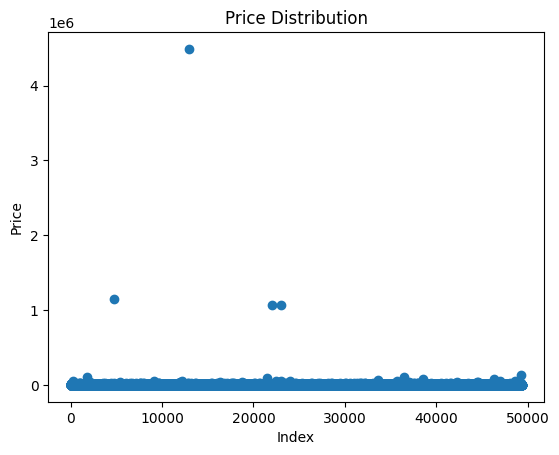

In [6]:
df_price = df['price'].values
plt.scatter(range(df_price.shape[0]), df_price)
plt.title("Price Distribution")
plt.xlabel("Index")
plt.ylabel("Price")
plt.show()

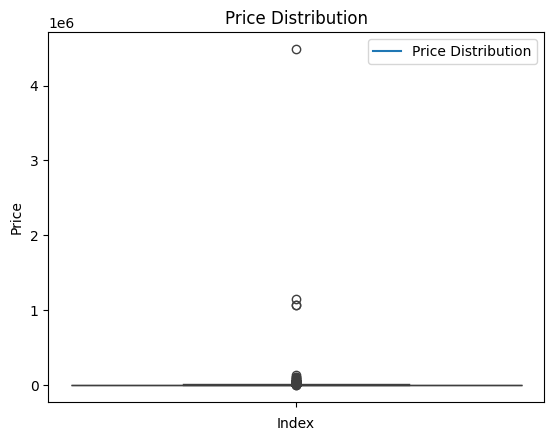

In [7]:
sns.boxplot(y='price', data=df)
plt.plot([], label='Price Distribution')
plt.title("Price Distribution")
plt.xlabel("Index")
plt.ylabel("Price")
plt.legend()
plt.show()

In [8]:
#Removal of outlier
upper_bound = np.percentile(df["price"].values, 99.9)
df_filtered = df[df["price"] <= upper_bound]

In [9]:
df_filtered["date"] = pd.to_datetime(df_filtered["created"]).dt.date
df_filtered["year"] = pd.to_datetime(df_filtered["date"]).dt.year
df_filtered["month"] = pd.to_datetime(df_filtered["date"]).dt.month
df_filtered["day"] = pd.to_datetime(df_filtered["date"]).dt.day
df_filtered["hour"] = pd.to_datetime(df_filtered["date"]).dt.hour
df_filtered["weekday"] = pd.to_datetime(df_filtered["date"]).dt.weekday
df_filtered["quarter"] = pd.to_datetime(df_filtered["date"]).dt.quarter
df_filtered.head(5)

C:\Users\musab\AppData\Local\Temp\ipykernel_12032\1562200966.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["date"] = pd.to_datetime(df_filtered["created"]).dt.date
C:\Users\musab\AppData\Local\Temp\ipykernel_12032\1562200966.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["year"] = pd.to_datetime(df_filtered["date"]).dt.year
C:\Users\musab\AppData\Local\Temp\ipykernel_12032\1562200966.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,...,price,street_address,interest_level,date,year,month,day,hour,weekday,quarter
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,...,2400,145 Borinquen Place,medium,2016-06-16,2016,6,16,0,3,2
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,...,3800,230 East 44th,low,2016-06-01,2016,6,1,0,2,2
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,...,3495,405 East 56th Street,medium,2016-06-14,2016,6,14,0,1,2
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,...,3000,792 Metropolitan Avenue,medium,2016-06-24,2016,6,24,0,4,2
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,...,2795,340 East 34th Street,low,2016-06-28,2016,6,28,0,1,2


**Dist Plot**

C:\Users\musab\AppData\Local\Temp\ipykernel_12032\1622520259.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_filtered["price"])


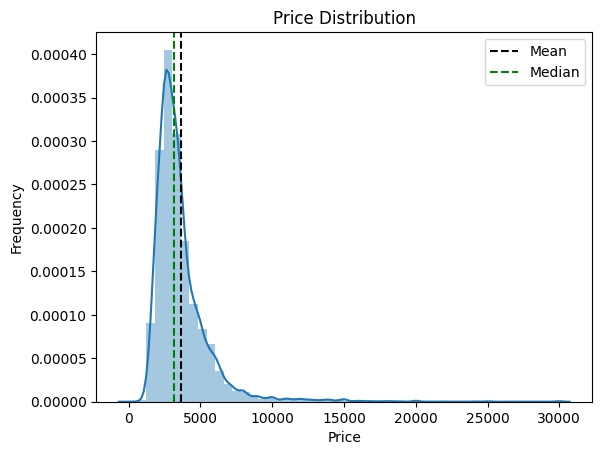

In [10]:
sns.distplot(df_filtered["price"])

#add mean and variance to plot
plt.axvline(df_filtered["price"].mean(), color='k', linestyle='dashed', label='Mean')
plt.axvline(df_filtered["price"].median(), color='g', linestyle='dashed', label='Median')

plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.legend()
plt.show()

**Observation**
The distribution of prices is right-skewed, meaning there are number of higher-priced houses pulling the mean above the median.

Median price is better indicator of the central tendency for this dataset.

**Reg Plot with Scatter Representation & Regression Line**

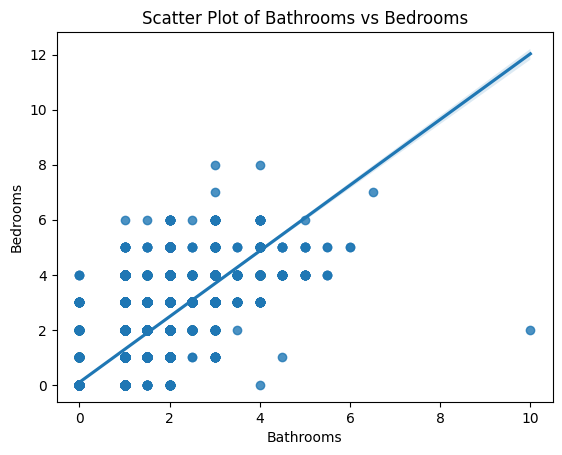

In [11]:
sns.regplot(x='bathrooms', y='bedrooms', data=df_filtered, scatter=True, fit_reg=True)
plt.title("Scatter Plot of Bathrooms vs Bedrooms")
plt.xlabel("Bathrooms")
plt.ylabel("Bedrooms")
plt.show()

**Observation**
Trend of bathroom is increasing as bedrooms are increasing. Most of the data-points are for smaller count of bedrooms.

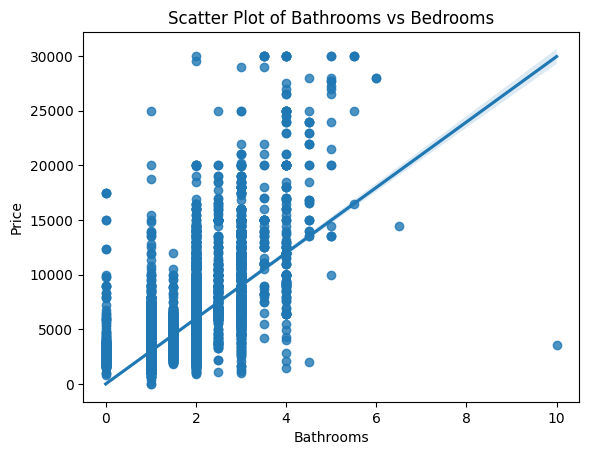

In [12]:
sns.regplot(x='bathrooms', y='price', data=df_filtered, scatter=True, fit_reg=True)
plt.title("Scatter Plot of Bathrooms vs Bedrooms")
plt.xlabel("Bathrooms")
plt.ylabel("Price")
plt.show()

**Observation**
Same trend is seen for bathrooms and price, i.e, positive correlation. And most of the dataset are on the lower end of the dataset

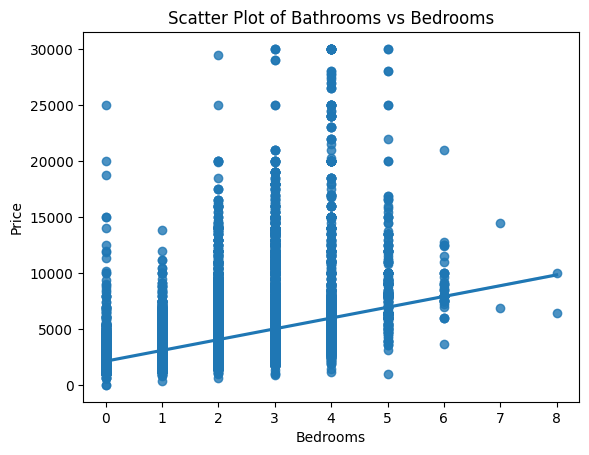

In [13]:
sns.regplot(x='bedrooms', y='price', data=df_filtered, scatter=True, fit_reg=True)
plt.title("Scatter Plot of Bathrooms vs Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()

**Observation**
This is also showing positive correlation between the number of bedrooms and the price of rental properties. However, there is interesting fact that with the same number of bedrooms, price varies drastically. As other factors also play crucial role in determining the rental prices, unlike between price and bathrooms.

In [14]:
df.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49352 entries, 4 to 124009
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        49352 non-null  float64
 1   bedrooms         49352 non-null  int64  
 2   building_id      49352 non-null  object 
 3   created          49352 non-null  object 
 4   description      49352 non-null  object 
 5   display_address  49352 non-null  object 
 6   features         49352 non-null  object 
 7   latitude         49352 non-null  float64
 8   listing_id       49352 non-null  int64  
 9   longitude        49352 non-null  float64
 10  manager_id       49352 non-null  object 
 11  photos           49352 non-null  object 
 12  price            49352 non-null  int64  
 13  street_address   49352 non-null  object 
 14  interest_level   49352 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


**EDA Plots**

What is a Seaborn Distplot?
A Distplot or distribution plot, depicts the variation in the data distribution. Seaborn Distplot represents the overall distribution of continuous data variables.

The Seaborn module along with the Matplotlib module is used to depict the distplot with different variations in it. The Distplot depicts the data by a histogram and a line in combination to it.

Ref Link: https://www.digitalocean.com/community/tutorials/seaborn-distplot

**Outlier Detector**

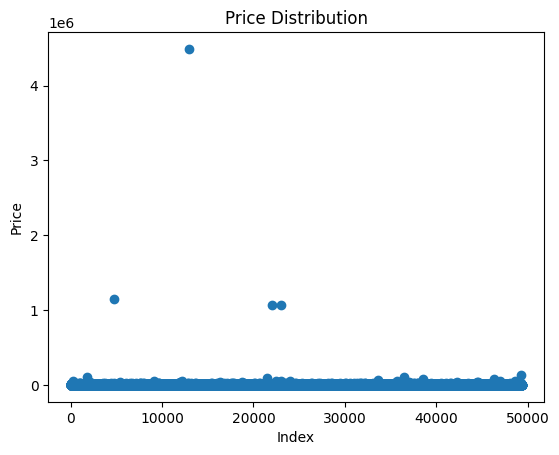

In [16]:
df_price = df['price'].values
plt.scatter(range(df_price.shape[0]), df_price)
plt.title("Price Distribution")
plt.xlabel("Index")
plt.ylabel("Price")
plt.show()

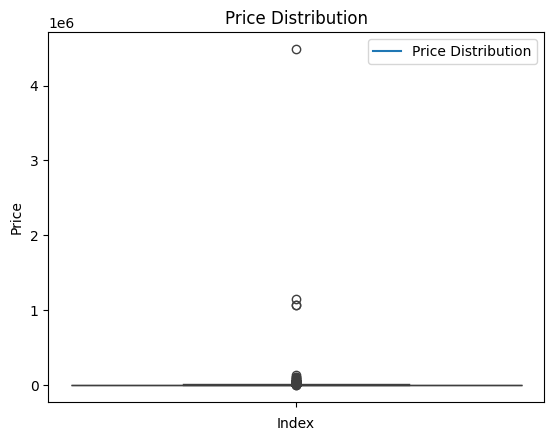

In [17]:
sns.boxplot(y='price', data=df)
plt.plot([], label='Price Distribution')
plt.title("Price Distribution")
plt.xlabel("Index")
plt.ylabel("Price")
plt.legend()
plt.show()

In [18]:
#Removal of outlier
upper_bound = np.percentile(df["price"].values, 99.9)
df_filtered = df[df["price"] <= upper_bound]

In [19]:
df_filtered["date"] = pd.to_datetime(df_filtered["created"]).dt.date
df_filtered["year"] = pd.to_datetime(df_filtered["date"]).dt.year
df_filtered["month"] = pd.to_datetime(df_filtered["date"]).dt.month
df_filtered["day"] = pd.to_datetime(df_filtered["date"]).dt.day
df_filtered["hour"] = pd.to_datetime(df_filtered["date"]).dt.hour
df_filtered["weekday"] = pd.to_datetime(df_filtered["date"]).dt.weekday
df_filtered["quarter"] = pd.to_datetime(df_filtered["date"]).dt.quarter
df_filtered.head(5)

C:\Users\musab\AppData\Local\Temp\ipykernel_12032\1562200966.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["date"] = pd.to_datetime(df_filtered["created"]).dt.date
C:\Users\musab\AppData\Local\Temp\ipykernel_12032\1562200966.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["year"] = pd.to_datetime(df_filtered["date"]).dt.year
C:\Users\musab\AppData\Local\Temp\ipykernel_12032\1562200966.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,...,price,street_address,interest_level,date,year,month,day,hour,weekday,quarter
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,...,2400,145 Borinquen Place,medium,2016-06-16,2016,6,16,0,3,2
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,...,3800,230 East 44th,low,2016-06-01,2016,6,1,0,2,2
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,...,3495,405 East 56th Street,medium,2016-06-14,2016,6,14,0,1,2
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,...,3000,792 Metropolitan Avenue,medium,2016-06-24,2016,6,24,0,4,2
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,...,2795,340 East 34th Street,low,2016-06-28,2016,6,28,0,1,2


**Dist Plot**

C:\Users\musab\AppData\Local\Temp\ipykernel_12032\1622520259.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_filtered["price"])


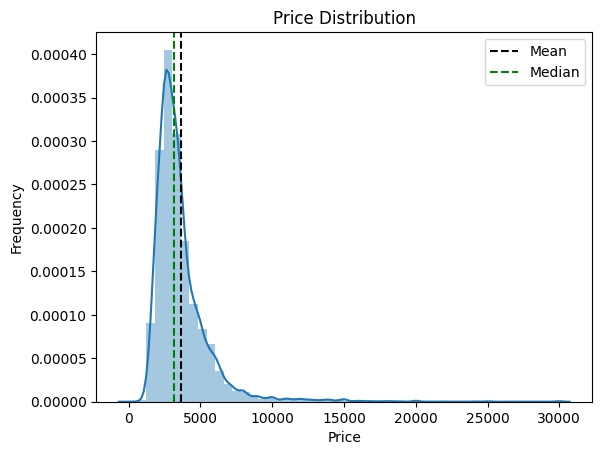

In [20]:
sns.distplot(df_filtered["price"])

#add mean and variance to plot
plt.axvline(df_filtered["price"].mean(), color='k', linestyle='dashed', label='Mean')
plt.axvline(df_filtered["price"].median(), color='g', linestyle='dashed', label='Median')

plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.legend()
plt.show()

**Observation**
The distribution of prices is right-skewed, meaning there are number of higher-priced houses pulling the mean above the median.

Median price is better indicator of the central tendency for this dataset.

**Reg Plot with Scatter Representation & Regression Line**

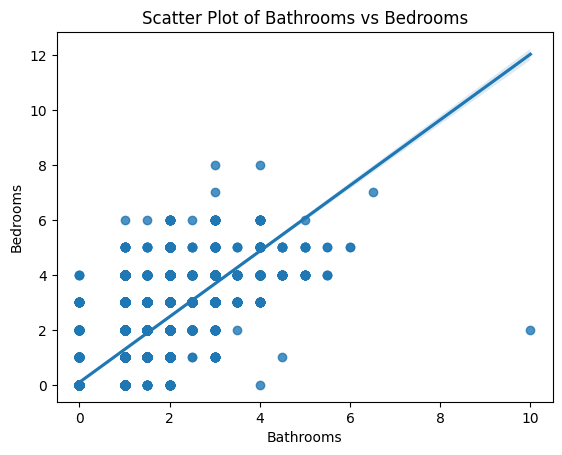

In [21]:
sns.regplot(x='bathrooms', y='bedrooms', data=df_filtered, scatter=True, fit_reg=True)
plt.title("Scatter Plot of Bathrooms vs Bedrooms")
plt.xlabel("Bathrooms")
plt.ylabel("Bedrooms")
plt.show()

**Observation**
Trend of bathroom is increasing as bedrooms are increasing. Most of the data-points are for smaller count of bedrooms.

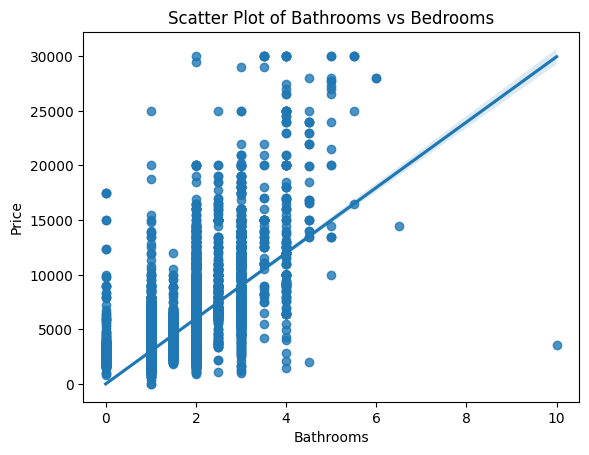

In [22]:
sns.regplot(x='bathrooms', y='price', data=df_filtered, scatter=True, fit_reg=True)
plt.title("Scatter Plot of Bathrooms vs Bedrooms")
plt.xlabel("Bathrooms")
plt.ylabel("Price")
plt.show()

**Observation**
Same trend is seen for bathrooms and price, i.e, positive correlation. And most of the dataset are on the lower end of the dataset

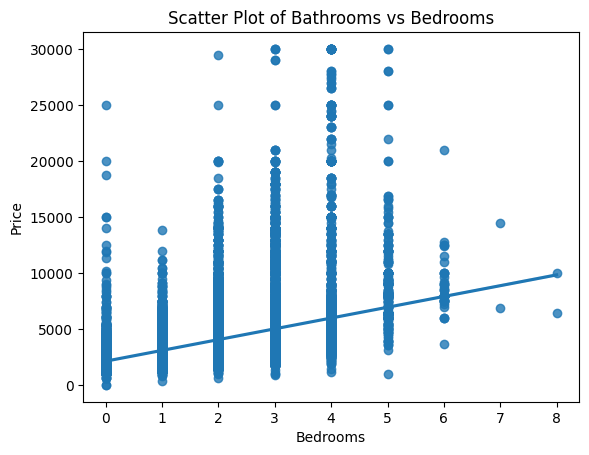

In [23]:
sns.regplot(x='bedrooms', y='price', data=df_filtered, scatter=True, fit_reg=True)
plt.title("Scatter Plot of Bathrooms vs Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()

**Observation**
This is also showing positive correlation between the number of bedrooms and the price of rental properties. However, there is interesting fact that with the same number of bedrooms, price varies drastically. As other factors also play crucial role in determining the rental prices, unlike between price and bathrooms.

Pair Plot
- We can see relationships between depenedent variable i.e interest_levels with independent variables such as bedrooms,bathrooms and price
- https://seaborn.pydata.org/generated/seaborn.pairplot.html

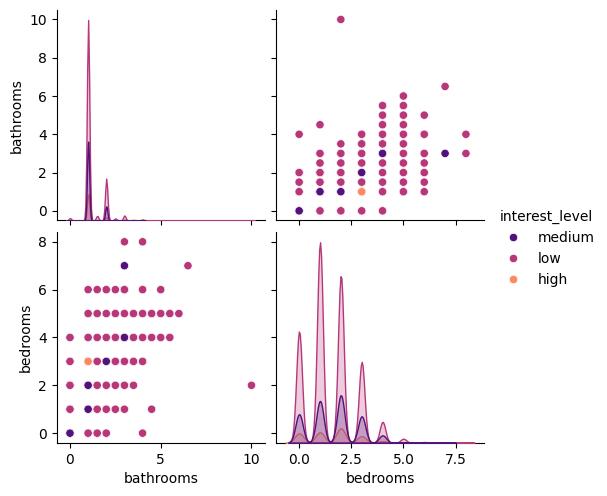

In [24]:

bath_bed_col = ['bathrooms', 'bedrooms','interest_level']
bath_bed_subset_data = df_filtered[bath_bed_col]

sns.pairplot(bath_bed_subset_data, hue='interest_level', palette="magma")
plt.show()

We can see from above plot that there is clear trend where listings with more bedrooms also tend to have more bathrooms. This makes sense, as larger apartments are likely to have more of both.Listings with low interest level dominate the plot, especially among listings with 1-3 bedrooms and 1-2 bathrooms.There is no strong visual indication of a specific bedroom or bathroom count leading to a significantly higher interest level

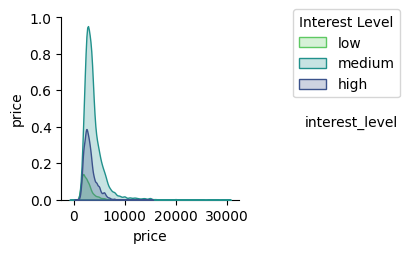

In [25]:
price_col = ['price','interest_level']
price_data = df_filtered[price_col]

price_int_pair_plot = sns.pairplot(price_data, hue='interest_level', palette="viridis")
price_int_pair_plot.figure.legend(title="Interest Level", labels=['low', 'medium', 'high'], loc='upper right', bbox_to_anchor=(1.15, 1))

plt.show()

From above plot we can see that the dataset mostly has the rental listings with price below $10k.High interest level listings are the least frequent, with a narrow distribution around lower prices. This suggests that fewer listings achieve high interest, and these are generally within an affordable price range.


Swarn Plot
- Dots represent the data points 
- Shows distribution between two variables based on the data points.
- https://seaborn.pydata.org/generated/seaborn.swarmplot.html

C:\Users\musab\AppData\Local\Temp\ipykernel_12032\3124179886.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x="interest_level", y="building_id", data=df_price_sample, palette="coolwarm")
C:\Users\musab\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 43.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\musab\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 69.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\musab\

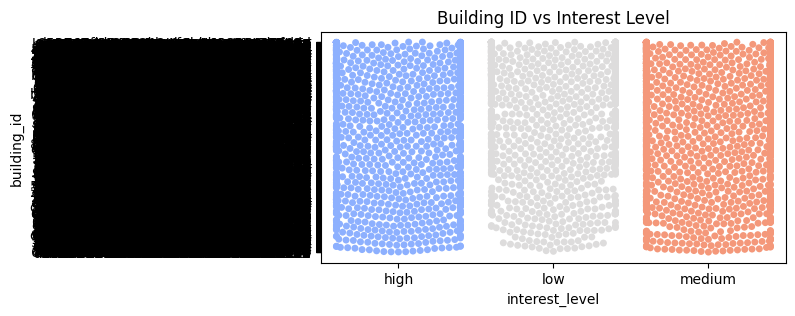

C:\Users\musab\AppData\Local\Temp\ipykernel_12032\3124179886.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x="interest_level", y="manager_id", data=df_price_sample, palette="coolwarm")
C:\Users\musab\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 49.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\musab\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 65.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\musab\A

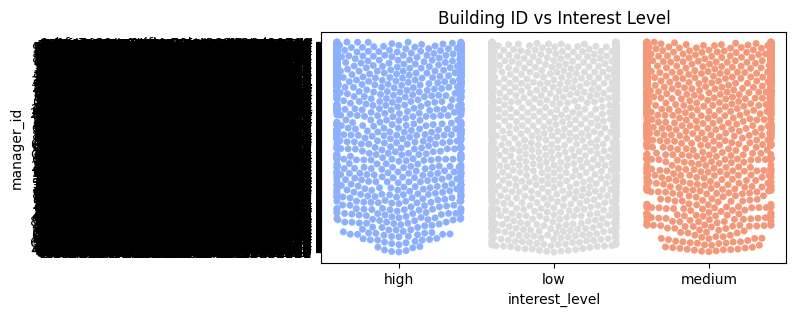

In [26]:
df_price_sample = df_filtered[df_filtered['price'] < 2000]
plt.figure(figsize=(6, 3))
sns.swarmplot(x="interest_level", y="building_id", data=df_price_sample, palette="coolwarm")
plt.title("Building ID vs Interest Level")
plt.show()

plt.figure(figsize=(6, 3))
sns.swarmplot(x="interest_level", y="manager_id", data=df_price_sample, palette="coolwarm")
plt.title("Building ID vs Interest Level")
plt.show()

From above plots we can see the building_id and manager_id are densely populated across all interest levels.So we can make a defining conclusion that this features can not be useful for classifying interest levels.

Scatter Plot

Using a scatter plot to visualize the distribution of rental prices

X-axis: Represents each property by its index in the DataFrame.
Y-axis: Represents the price of renting each property.

Used: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html


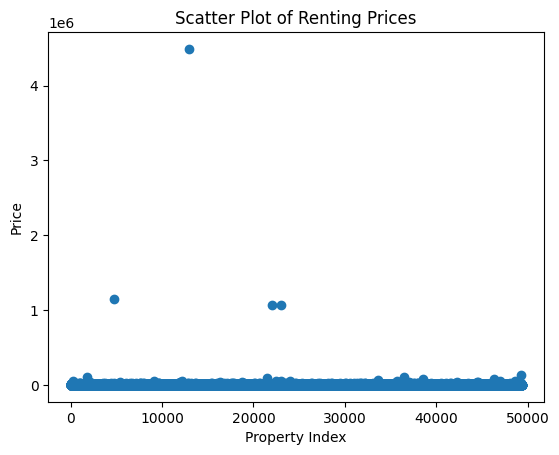

In [29]:

df_price_sample = df["price"].values
plt.scatter(range(df.shape[0]), df_price_sample)
plt.title("Scatter Plot of Renting Prices")
plt.xlabel("Property Index")
plt.ylabel("Price")
plt.show()

Observations

The majority of data points being concentrated at the lower end of the price range suggests that most properties in the dataset have relatively low rental prices. This could imply that affordable rental properties dominate the dataset.

The scatter plot reveals that there are data points significantly above the main cluster, representing properties with much higher rental prices. These are outliers.

Outliers can have a significant impact on statistical analyses and models, as they may skew the distribution of the data and lead to inaccurate predictive models if not handled properly.

QQ Plot

A QQ plot (Quantile-Quantile plot) is a graphical tool used to compare the distribution of a dataset to a theoretical distribution (often a normal distribution) to see if the data follows that distribution. It helps in assessing whether a set of data follows a particular distribution or not.